# Using wine data set and Applying PCA for it 

In [1]:
#numerical libraries
import numpy as np
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression
#to handle data in form of rows and colums
import pandas as pd
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#to eneable plootting graphs in Jupyter notebook
%matplotlib inline
import statsmodels.formula.api as smf
from scipy import stats
#to find the rmse score and r square value
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df_a=pd.read_csv("/Users/sairam/Downloads/Regression/wine.xls",header=None)

In [3]:
df_a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_a.columns=["class","alc","Malc","Ash","A_ash","Mag","Tot_Ph","Fla","NonFP","Pro","ColInt","Hue","Od","Proline"]

In [8]:
df_a.head()

,class,alc,Malc,Ash,A_ash,Mag,Tot_Ph,Fla,NonFP,Pro,ColInt,Hue,Od,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class      178 non-null int64
alc        178 non-null float64
Malc       178 non-null float64
Ash        178 non-null float64
A_ash      178 non-null float64
Mag        178 non-null int64
Tot_Ph     178 non-null float64
Fla        178 non-null float64
NonFP      178 non-null float64
Pro        178 non-null float64
ColInt     178 non-null float64
Hue        178 non-null float64
Od         178 non-null float64
Proline    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
df_a.corr()

,class,alc,Malc,Ash,A_ash,Mag,Tot_Ph,Fla,NonFP,Pro,ColInt,Hue,Od,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alc,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malc,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
A_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mag,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Tot_Ph,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Fla,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonFP,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Pro,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


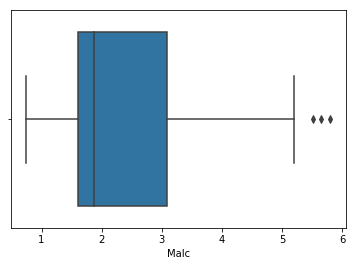

In [27]:
sns.boxplot(df_a.Malc)

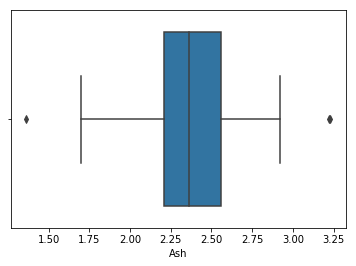

In [21]:
sns.boxplot(df_a.Ash)

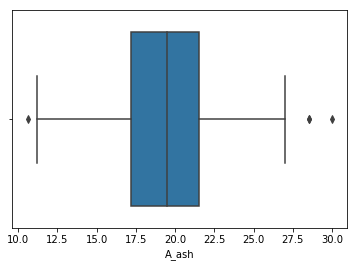

In [22]:
sns.boxplot(df_a.A_ash)  # here there is one lower wisker out laier and two high wisker in the Alcalinity of ash 

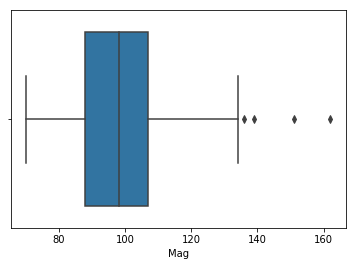

In [23]:
sns.boxplot(df_a.Mag)

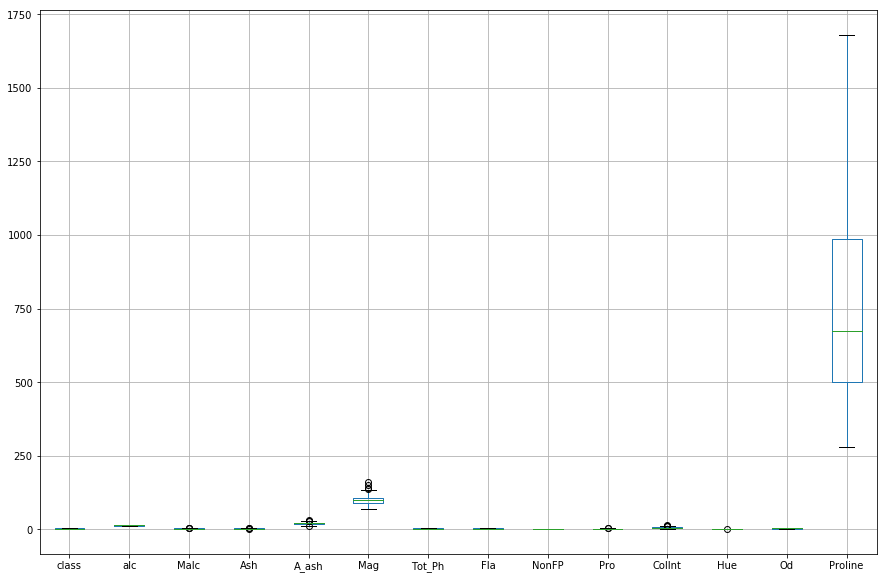

In [35]:
plt.figure(figsize=[15,10])  #here we are plotting the boxplot for all the columns in the dataset. 
df_a.boxplot()               #We can observe there are seven(7) features with outlaiers

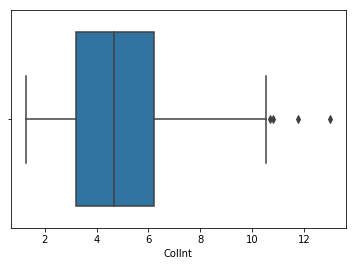

In [38]:
sns.boxplot(df_a.ColInt) # here we can observe three out laiers in the color intensity with four(4) extreme values

In [39]:
df_a.std() # Standard Deviation of all the features 

class        0.775035
alc          0.811827
Malc         1.117146
Ash          0.274344
A_ash        3.339564
Mag         14.282484
Tot_Ph       0.625851
Fla          0.998859
NonFP        0.124453
Pro          0.572359
ColInt       2.318286
Hue          0.228572
Od           0.709990
Proline    314.907474
dtype: float64

# Standardization

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition , preprocessing

In [65]:
df = df_a.drop('class', axis=1)

In [67]:
#standardize data

df_a_std = StandardScaler().fit_transform(df)

In [74]:
df_a_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Creating Covariance Matrix 

In [69]:
#create covariance matrix
cov_mat = np.cov(df_a_std.T)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0

In [70]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.4229

In [71]:
# sort eigenvalues in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range
(len(eig_vals))]


In [75]:
tot = sum(eig_vals)
cum_var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Cummulative Variance Explained", cum_var_exp)


Cummulative Variance Explained [36.19884809992634, 19.207490257008914, 11.123630536249989, 7.069030182714036, 6.5632936796486, 4.935823319222559, 4.2386793226233275, 2.680748948378866, 2.222153404789713, 1.9300190939440791, 1.7368356899899164, 1.2982325756042146, 0.7952148898994482]


In [76]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


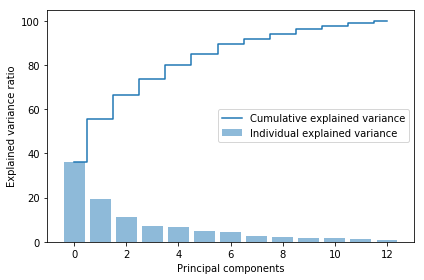

In [103]:
plt.figure(figsize=(6, 4))
plt.bar(range(13), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(13), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 

In [118]:
# pca = decomposition.PCA(n_components = 4)
# pca.fit_transform(df_a_std)
# transformed_pca = pca.transform(df_a_std)
# p_df= pd.DataFrame(transformed_pca)

In [102]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.9980912304918974, 0.9998271461166032, 0.9999221050741547, 0.9999723224303368]


# Logistic Regression 

In [108]:
lr1 = LogisticRegression() #logistic regression for model1
lr2 = LogisticRegression() # Logistic regression for model 2

In [109]:
X=df_a.drop('class', axis=1)
Y=df_a['class']

# Model 1 in Logistic Rgeression without PCA

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2) #Splitting the data for model1


In [113]:
lr1.fit(X_train,Y_train) #fitting the model 1
y1_pred = lr1.predict(X_test) # predicted values of the model 1

In [114]:
y1_acc = metrics.accuracy_score(Y_test,y1_pred) #Accuracy score of the model 1

In [115]:
y1_acc

0.9444444444444444

# Model 2 in Logistic Reression with PCA 

In [135]:
pca = decomposition.PCA(n_components = 5)# with PCA accuray with n_components = 5
pca.fit_transform(df_a_std)
transformed_pca = pca.transform(df_a_std)
p_df= pd.DataFrame(transformed_pca)

In [136]:
p_df.head()

,0,1,2,3,4
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458


In [137]:
x = p_df
y = Y

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4) #splitting the data for model2

In [139]:
lr2.fit(x_train,y_train) #fitting the model 1
y2_pred = lr2.predict(x_test) # predicted values of the model 1

In [140]:
y2_acc = metrics.accuracy_score(y_test,y2_pred) #Accuracy score of the model 1

In [141]:
y2_acc

1.0

In [142]:
pca = decomposition.PCA(n_components = 8) # with PCA accuray with n_components = 8
pca.fit_transform(df_a_std)
transformed_pca = pca.transform(df_a_std)
p_df= pd.DataFrame(transformed_pca)

In [143]:
p_df.head()

,0,1,2,3,4,5,6,7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


In [146]:
x = p_df
y = Y

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4) #splitting the data for model2

In [148]:
lr2.fit(x_train,y_train) #fitting the model 2
y2_pred = lr2.predict(x_test) # predicted values of the model 2

In [149]:
y2_acc = metrics.accuracy_score(y_test,y2_pred) #Accuracy score of the model 2

In [150]:
y2_acc

1.0